### Importing modules

In [2]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sns.set()

### Functions for Visualizing the data


In [18]:

def visualize(data,labels,color):
    color = color.map({0: 'red', 1: 'orange'})
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(data[0],data[1], data[2], c=color, s=60)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    ax.set_zlabel(labels[2])
    plt.show()
    
def configureAxis(ax,data,labels,title=''):
    ax.bar(data[0], data[1])
    ax.set_title(title)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    
def elbowMethod(MAX_SIZE):
    wcss = []
    for k in range(1,MAX_SIZE):
        kmeans = KMeans(n_clusters=k, init="k-means++")
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        
    plt.figure(figsize=(10,5))    
    plt.grid()
    plt.plot(range(1,MAX_SIZE),wcss, linewidth=2, color="orange", marker ="8")
    plt.xlabel("K Value")
    plt.xticks(np.arange(1,MAX_SIZE,1))
    plt.ylabel("WCSS")
    plt.show()  

### Loading data

In [13]:

rawData = pd.read_csv('customer-segmentation-dataset/Mall_Customers.csv',index_col=0)
rawData

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### Making necessary changes for the proper working of algorithm

In [39]:
data = rawData.copy()
SPENDING_SCORE = "Spending Score (1-100)"
ANNUAL_INCOME ="Annual Income (k$)"

data['Gender'].replace('Male',0,inplace=True)
data['Gender'].replace('Female',1,inplace=True)

### Visualizing the data

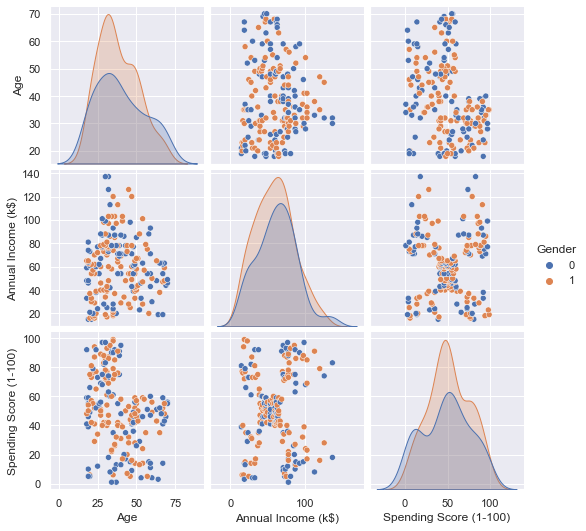

In [15]:
sns.pairplot(data[["Age",ANNUAL_INCOME,SPENDING_SCORE,"Gender"]], hue='Gender')

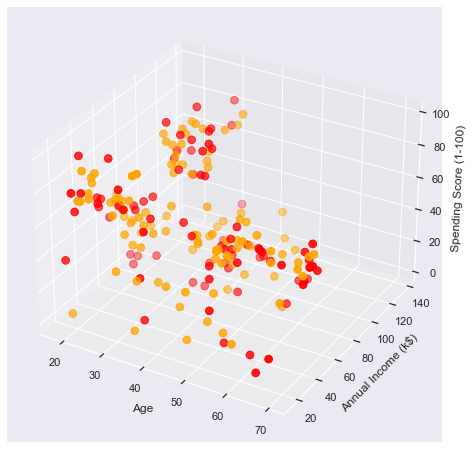

In [19]:
visualize((data['Age'],data["Annual Income (k$)"],data["Spending Score (1-100)"]),
          ("Age","Annual Income (k$)",'Spending Score (1-100)'),data['Gender'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

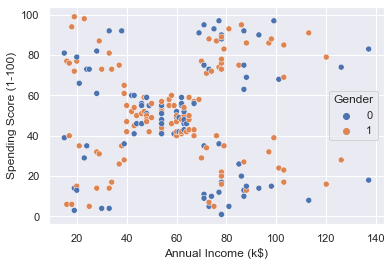

In [20]:
sns.scatterplot(data=data,x="Annual Income (k$)",y="Spending Score (1-100)",hue=data['Gender'])

<AxesSubplot:ylabel='Spending Score (1-100)'>

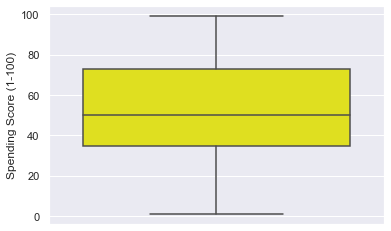

In [25]:
sns.boxplot(y=data["Spending Score (1-100)"], color="yellow")

### Analyzing the data based on different ranges

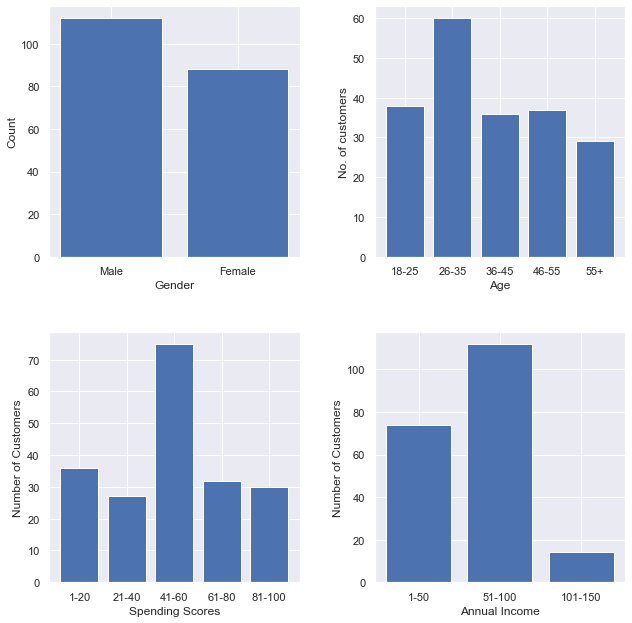

In [29]:
age18_25 = data[(data.Age >= 18 ) & (data.Age <= 25 )].Age
age26_35 = data[(data.Age >= 26 ) & (data.Age <= 35 )].Age
age36_45 = data[(data.Age >= 36 ) & (data.Age <= 45 )].Age
age46_55 = data[(data.Age >= 46 ) & (data.Age <= 55 )].Age
age_55 = data[(data.Age > 55 )].Age

ANNUAL_INCOMES = data[[ANNUAL_INCOME]]

annualIncome1_50 = ANNUAL_INCOMES[(ANNUAL_INCOMES[ANNUAL_INCOME] <= 50 )]
annualIncome51_100 = ANNUAL_INCOMES[(ANNUAL_INCOMES[ANNUAL_INCOME] >= 51 ) & (ANNUAL_INCOMES[ANNUAL_INCOME] <= 100 )]
annualIncome101_150 = ANNUAL_INCOMES[(ANNUAL_INCOMES[ANNUAL_INCOME] >= 101 ) & (ANNUAL_INCOMES[ANNUAL_INCOME] <= 150 )]

ss1_20 = data[(data[SPENDING_SCORE] >= 1) & (data[SPENDING_SCORE] <= 20)][SPENDING_SCORE]
ss21_40 = data[(data[SPENDING_SCORE] >= 21) & (data[SPENDING_SCORE] <= 40)][SPENDING_SCORE]
ss41_60 = data[(data[SPENDING_SCORE] >= 41) & (data[SPENDING_SCORE] <= 60)][SPENDING_SCORE]
ss61_80 = data[(data[SPENDING_SCORE] >= 61) & (data[SPENDING_SCORE] <= 80)][SPENDING_SCORE]
ss81_100 = data[(data[SPENDING_SCORE] >= 81) & (data[SPENDING_SCORE] <= 100)][SPENDING_SCORE]

fig, axes = plt.subplots(2, 2)

fig.set_figheight(10)
fig.set_figwidth(10)

configureAxis(axes[0,0],(['Male','Female'],data.Gender.value_counts().values), ('Gender','Count'),'')

configureAxis(axes[0,1],(["18-25","26-35","36-45","46-55","55+"],[len(age18_25.values),len(age26_35.values)\
         ,len(age36_45.values),len(age46_55.values),len(age_55.values)]), ('Age','No. of customers'),'')

configureAxis(axes[1,0],(["1-20", "21-40", "41-60", "61-80", "81-100"],[len(ss1_20.values),len(ss21_40.values)\
         ,len(ss41_60.values),len(ss61_80.values),len(ss81_100.values)]), ('Spending Scores','Number of Customers'),'')

configureAxis(axes[1,1],(["1-50", "51-100", "101-150"],[len(annualIncome1_50.values),len(annualIncome51_100.values)\
         ,len(annualIncome101_150.values)]), ('Annual Income','Number of Customers'),'')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=.3, 
                    hspace=.3)

plt.show()

### Getting optimum no. of cluster with the help of Elbow Method

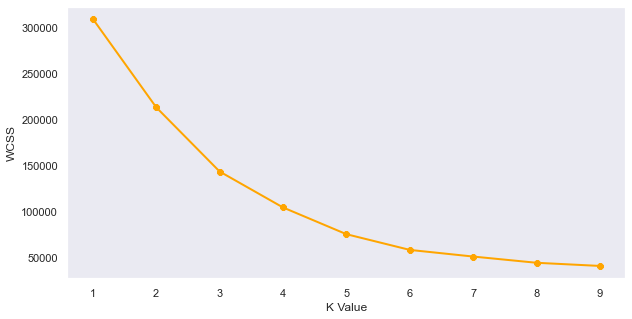

In [33]:
elbowMethod(10)

### Performing K-Means Clustering

In [40]:
noOfClusters = 4

model = KMeans(noOfClusters)
clusters = model.fit_predict(data.iloc[:,1:])
data["Cluster"] = clusters
data["Cluster"] = data["Cluster"].map({0: 'Cluster 1', 1: 'Cluster 2',2: 'Cluster 3',3: 'Cluster 4'})
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,,
1,0,19,15,39,Cluster 2
2,0,21,15,81,Cluster 2
3,1,20,16,6,Cluster 1
4,1,23,16,77,Cluster 2
5,1,31,17,40,Cluster 1
...,...,...,...,...,...
196,1,35,120,79,Cluster 3
197,1,45,126,28,Cluster 4
198,0,32,126,74,Cluster 3


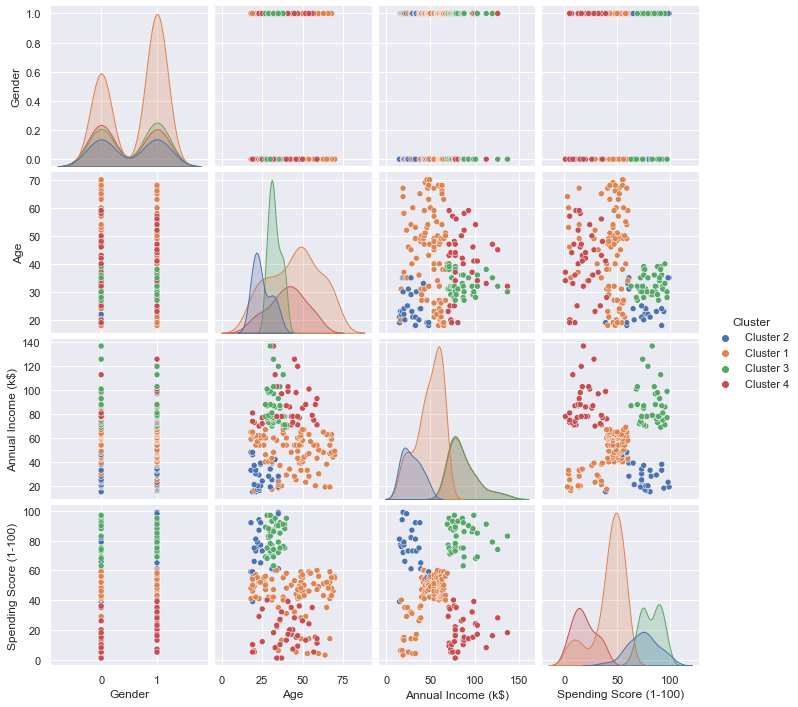

In [41]:
sns.pairplot(data, hue='Cluster')

<ul>
    <li><b>Cluster 1</b></li>Customers in this cluster buy fewer items because of their minimal annual income. Generally this cluster consists of people with age above 35 <br>

<li><b>Cluster 2</b></li> 
	People in this group spend most of the money in buying things. They are not having good annual income and buy things with parent's money or others. Most of the youngsters without their own income constitutes this group.<br>

<li><b>Cluster 3</b></li> 
	Customers in this cluster buy a lot in apparel. They purchase the most items, and have the highest spending per item.The cluster skews slightly female. This cluster consists of the most youngsters. They can be called as Spendthrifts.<br>

<li><b> Cluster 4</b></li> 
	This is the most populated cluster. Customers in this cluster make small numbers of purchases and spend less on average. They are typically one time buyers.The people in this cluster can be called as The Compulsive Saver or Tightwads.<br>
</ul>